In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.listdir()

['titanic-tree.ipynb',
 'test.csv',
 'v5.csv',
 '.ipynb_checkpoints',
 'v3.csv',
 'v6.csv',
 'v2.csv',
 'gender_submission.csv',
 'v4.csv',
 'train.csv',
 'decision_v1.csv',
 'titanic-knn.ipynb',
 'titanic.zip']

In [3]:
df = pd.read_csv("train.csv")
teste = pd.read_csv('test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.drop("Cabin", axis=1, inplace=True) # df.dropna(axis=1, thresh=600, inplace=True)

In [9]:
teste.dropna(axis=1, thresh=200, inplace=True)

In [10]:
teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


# Procurando distribuição de idades

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

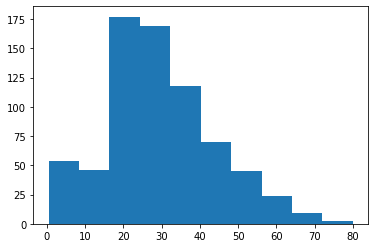

In [13]:
plt.hist(df["Age"])

In [14]:
df['Age'].mean()

29.69911764705882

In [16]:
df['Age'].std()

14.526497332334042

(array([  6.,  21.,  49., 119., 186., 220., 157.,  89.,  39.,  14.]),
 array([-14.81527554,  -6.48814308,   1.83898937,  10.16612183,
         18.49325429,  26.82038675,  35.14751921,  43.47465167,
         51.80178413,  60.12891659,  68.45604905]),
 <a list of 10 Patch objects>)

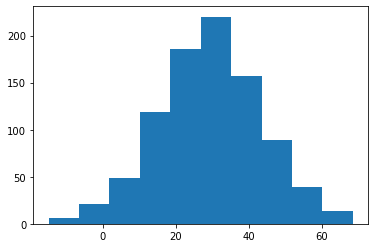

In [249]:
plt.hist(np.random.normal(loc=df['Age'].mean(), scale=df['Age'].std(), size=900))

In [266]:
from scipy.stats import kurtosis
kurtosis(teste_d)

0.16863657224286044

In [264]:
teste_d = df["Age"].dropna()

In [265]:
teste_d

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [ ]:
df.loc[:,'Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
teste.loc[:,'Age'] = teste['Age'].fillna(teste['Age'].mean())

In [ ]:
teste.loc[:,'Fare'] = teste['Fare'].fillna(0)

In [ ]:
df.dropna(axis=0, subset=['Embarked'], inplace=True)

In [ ]:
df.columns

As colunas Embarked e Ticket não tem muito interesse para o modelo.

In [ ]:
df.dtypes

In [ ]:
teste.drop( ['Name', 'Ticket'], axis=1, inplace=True)
df.drop( ['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df)
df.head()

In [ ]:
teste = pd.get_dummies(teste)

In [ ]:
teste.head()

# Antes de normalizar o peso das variáveis

In [ ]:
target = 'Survived'
features = list(df.columns)
features.remove('PassengerId')
features.remove(target)

print(target)
print()
print(features)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)

In [ ]:
clf.fit(df[features], df[target])

In [ ]:
y_pred = clf.predict(teste[features])

In [ ]:
teste.loc[:,"Survived"] = y_pred

In [ ]:
teste

In [ ]:
teste[["PassengerId","Survived"]].to_csv('gender_submission.csv', index=False) # score = 0.622

## Ajustando escala das features

Ajustar:
- Age
- Fare

In [ ]:
teste.drop("Survived", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[["Age", "Fare"]])
df[["Age", "Fare"]] = pd.DataFrame(scaler.transform(df[["Age", "Fare"]]), columns=df[["Age", "Fare"]].columns)

scaler.fit(teste[["Age", "Fare"]])
teste[["Age", "Fare"]] = pd.DataFrame(scaler.transform(teste[["Age", "Fare"]]), columns=teste[["Age", "Fare"]].columns)



In [ ]:
df = df.dropna()

In [ ]:
target = 'Survived'
features = list(df.columns)
features.remove('PassengerId')
features.remove(target)

print(target)
print()
print(features)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(df[features], df[target])
y_pred = clf.predict(teste[features])
teste.loc[:,"Survived"] = y_pred
teste[["PassengerId","Survived"]].to_csv('v2.csv', index=False)  # 0.73

## Mudando quantidade de vizinhos

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(df[features], df[target])
y_pred = clf.predict(teste[features])
teste.loc[:,"Survived"] = y_pred
teste[["PassengerId","Survived"]].to_csv('v3.csv', index=False) # 0.76

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(df[features], df[target])
y_pred = clf.predict(teste[features])
teste.loc[:,"Survived"] = y_pred
teste[["PassengerId","Survived"]].to_csv('v4.csv', index=False) # 0.75

# Multiplicando coluna mulher por 2

In [ ]:
df.columns

In [ ]:
df.loc[:, 'Sex_female'] = df["Sex_female"]/2

In [ ]:
df

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(df[features], df[target])
y_pred = clf.predict(teste[features])
teste.loc[:,"Survived"] = y_pred
teste[["PassengerId","Survived"]].to_csv('v5.csv', index=False) # 0.765 

In [ ]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(df[features], df[target])
y_pred = clf.predict(teste[features])
teste.loc[:,"Survived"] = y_pred
teste[["PassengerId","Survived"]].to_csv('v6.csv', index=False) # 0.775

# Tentando com Randon Forest e Decision Tree

In [ ]:
df = pd.read_csv("train.csv")
teste = pd.read_csv('test.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

target = 'Survived'
features = list(df.columns)
features.remove('PassengerId')
features.remove(target)

print(target)
print()
print(features)



In [ ]:
model = DecisionTreeRegressor(random_state=1)
model.fit(df[features], df[target])